In [8]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
from env_helpers import make_env
from visualization import states_to_imgs
# Add the parent directory to path
sys.path.insert(1, os.path.join(sys.path[0], '..'))

env = make_env('MiniGrid-Empty-6x6-v0')

# Get initial observation
obs = env.reset()




Raw observation type: <class 'numpy.ndarray'>
Raw observation shape: (3, 48, 48)
Raw observation dtype: float64
Raw observation range: [0.000, 1.000]
Channels: 3, Height: 48, Width: 48
Channel 0 unique values: [0.         0.12941176 0.21568627 0.21960784 0.39215686 0.44313725
 0.55294118 0.88627451 1.        ]
Channel 1 unique values: [0.         0.12941176 0.21568627 0.39215686 1.        ]
Channel 2 unique values: [0.         0.12941176 0.21568627 0.39215686]


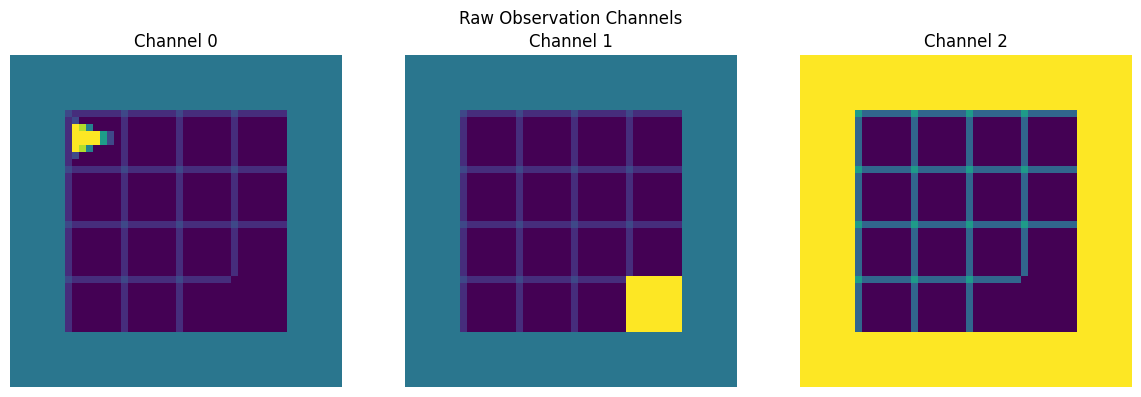

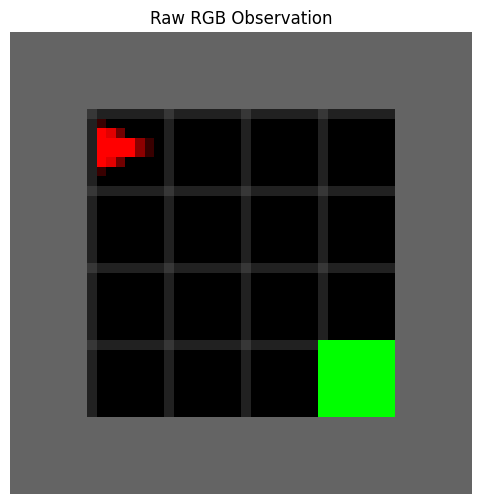

In [15]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt

# Add the parent directory to path
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from env_helpers import make_env
from visualization import states_to_imgs





env = make_env('MiniGrid-Empty-6x6-v0')

# Get initial observation
obs = env.reset()



obs = obs[0]

print(f"Raw observation type: {type(obs)}")
print(f"Raw observation shape: {obs.shape}")
print(f"Raw observation dtype: {obs.dtype}")
print(f"Raw observation range: [{obs.min():.3f}, {obs.max():.3f}]")

# Check if observation has proper spatial dimensions
if len(obs.shape) == 3:
    print(f"Channels: {obs.shape[0]}, Height: {obs.shape[1]}, Width: {obs.shape[2]}")

# Visualize each channel
fig, axes = plt.subplots(1, obs.shape[0], figsize=(12, 4))
if obs.shape[0] == 1:
    axes = [axes]

for i in range(obs.shape[0]):
    channel = obs[i]
    axes[i].imshow(channel, cmap='viridis')
    axes[i].set_title(f'Channel {i}')
    axes[i].axis('off')
    print(f"Channel {i} unique values: {np.unique(channel)}")

plt.suptitle('Raw Observation Channels')
plt.tight_layout()
plt.savefig('debug_raw_channels.png', dpi=150, bbox_inches='tight')
plt.show()


# Visualize full RGB if 3 channels
if obs.shape[0] == 3:
    rgb_img = obs.transpose(1, 2, 0)
    plt.figure(figsize=(6, 6))
    plt.imshow(rgb_img.clip(0, 1))
    plt.title('Raw RGB Observation')
    plt.axis('off')
    plt.savefig('debug_raw_rgb.png', dpi=150, bbox_inches='tight')
    plt.show()


Input tensor shape: torch.Size([3, 48, 48])
Input tensor dtype: torch.float32
Input tensor range: [0.000, 1.000]
Processing tensor shape: torch.Size([1, 3, 48, 48])
Converted output type: <class 'numpy.ndarray'>
Converted output shape: (1, 3, 48, 48)
Converted output dtype: float32
Converted output range: [0.000, 1.000]


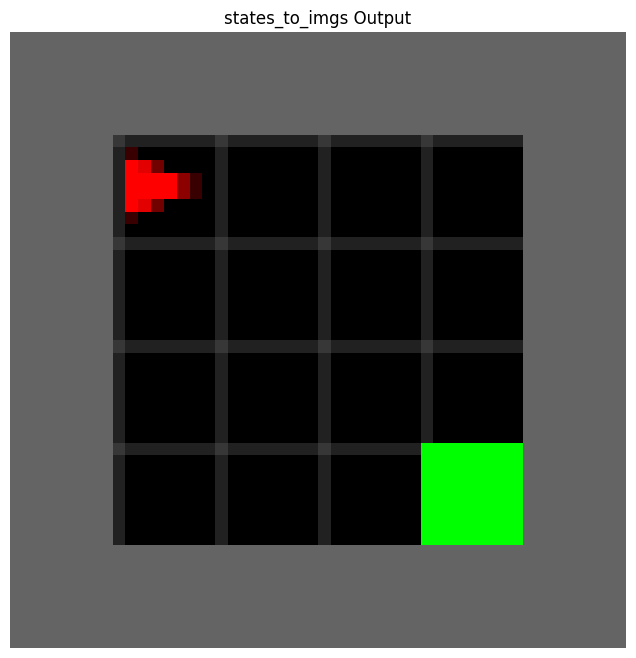

In [16]:
if isinstance(obs, np.ndarray):
    obs_tensor = torch.from_numpy(obs).float()
else:
    obs_tensor = obs.float()

print(f"Input tensor shape: {obs_tensor.shape}")
print(f"Input tensor dtype: {obs_tensor.dtype}")
print(f"Input tensor range: [{obs_tensor.min():.3f}, {obs_tensor.max():.3f}]")

# Test states_to_imgs function

if len(obs_tensor.shape) == 3:
    obs_tensor = obs_tensor.unsqueeze(0)  # Add batch dimension

print(f"Processing tensor shape: {obs_tensor.shape}")

# Call states_to_imgs
converted_imgs = states_to_imgs(obs_tensor, env_name='MiniGrid-Empty-6x6-v0')

print(f"Converted output type: {type(converted_imgs)}")
print(f"Converted output shape: {converted_imgs.shape}")
print(f"Converted output dtype: {converted_imgs.dtype}")
print(f"Converted output range: [{converted_imgs.min():.3f}, {converted_imgs.max():.3f}]")

# Visualize the conversion result
if len(converted_imgs.shape) == 4:  # Batch of images
    img = converted_imgs[0]
else:
    img = converted_imgs

# Handle different channel arrangements
if len(img.shape) == 3:
    if img.shape[0] <= 3:  # Channels first
        img_display = img.transpose(1, 2, 0)
    else:  # Channels last
        img_display = img
else:
    img_display = img

plt.figure(figsize=(8, 8))
plt.imshow(img_display.clip(0, 1))
plt.title('states_to_imgs Output')
plt.axis('off')
plt.savefig('debug_states_to_imgs.png', dpi=150, bbox_inches='tight')
plt.show()


Step 1: Raw MiniGrid environment
  Raw obs type: <class 'dict'>, keys: ['image', 'direction', 'mission']
  Raw image shape: (7, 7, 3)
Step 2: After RGBImgPartialObsWrapper
  RGB obs type: <class 'dict'>, keys: ['image', 'direction', 'mission']
  RGB image shape: (56, 56, 3)
  RGB image range: [76, 255]
Step 3: After ImgObsWrapper
  ImgObs type: <class 'numpy.ndarray'>, shape: (56, 56, 3)
  ImgObs range: [76, 255]
Step 4: After Custom2DWrapper
  Final obs type: <class 'numpy.ndarray'>, shape: (3, 56, 56)
  Final obs range: [0.298, 1.000]


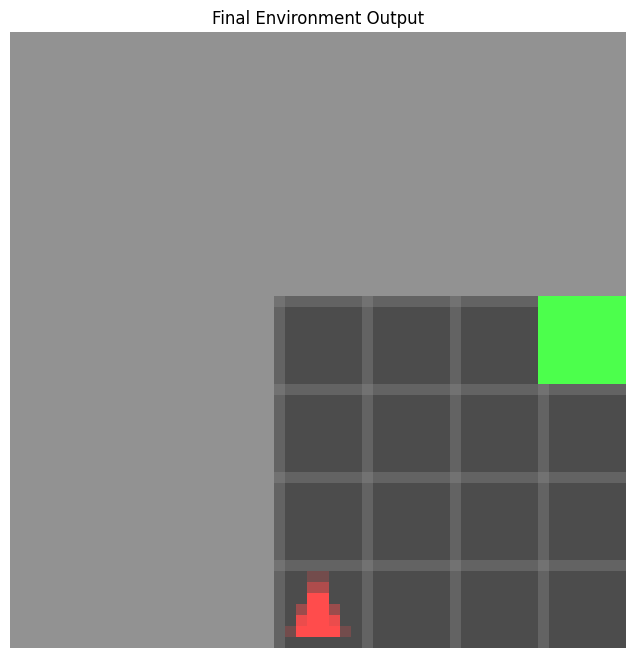

In [21]:
import gymnasium as gym
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
from env_helpers import Custom2DWrapper

# Step 1: Raw MiniGrid
print("Step 1: Raw MiniGrid environment")
env1 = gym.make('MiniGrid-Empty-6x6-v0')
obs1 = env1.reset()
if isinstance(obs1, tuple):
    obs1 = obs1[0]
print(f"  Raw obs type: {type(obs1)}, keys: {list(obs1.keys()) if isinstance(obs1, dict) else 'not dict'}")
if isinstance(obs1, dict) and 'image' in obs1:
    print(f"  Raw image shape: {obs1['image'].shape}")

# Step 2: RGB wrapper
print("Step 2: After RGBImgPartialObsWrapper")
env2 = RGBImgPartialObsWrapper(env1)
obs2 = env2.reset()
if isinstance(obs2, tuple):
    obs2 = obs2[0]
print(f"  RGB obs type: {type(obs2)}, keys: {list(obs2.keys()) if isinstance(obs2, dict) else 'not dict'}")
if isinstance(obs2, dict) and 'image' in obs2:
    print(f"  RGB image shape: {obs2['image'].shape}")
    print(f"  RGB image range: [{obs2['image'].min()}, {obs2['image'].max()}]")

# Step 3: ImgObsWrapper
print("Step 3: After ImgObsWrapper")
env3 = ImgObsWrapper(env2)
obs3 = env3.reset()
if isinstance(obs3, tuple):
    obs3 = obs3[0]
print(f"  ImgObs type: {type(obs3)}, shape: {obs3.shape if hasattr(obs3, 'shape') else 'no shape'}")
if hasattr(obs3, 'shape'):
    print(f"  ImgObs range: [{obs3.min()}, {obs3.max()}]")

# Step 4: Custom2DWrapper
print("Step 4: After Custom2DWrapper")
env4 = Custom2DWrapper(env3)
obs4 = env4.reset()
if isinstance(obs4, tuple):
    obs4 = obs4[0]
print(f"  Final obs type: {type(obs4)}, shape: {obs4.shape if hasattr(obs4, 'shape') else 'no shape'}")
if hasattr(obs4, 'shape'):
    print(f"  Final obs range: [{obs4.min():.3f}, {obs4.max():.3f}]")

# Visualize the final result
if hasattr(obs4, 'shape') and len(obs4.shape) == 3:
    plt.figure(figsize=(8, 8))
    if obs4.shape[0] <= 3:
        display_img = obs4.transpose(1, 2, 0)
    else:
        display_img = obs4
    plt.imshow(display_img.clip(0, 1))
    plt.title('Final Environment Output')
    plt.axis('off')
    plt.savefig('debug_final_env_output.png', dpi=150, bbox_inches='tight')
    plt.show()

# Clean up
env1.close()
env2.close()
env3.close()
env4.close()